In [ ]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')
# 'monokai', 'chesterish', 'oceans16', 'solarizedl', 'solarizedd', 'grade3', 'onedork'

In [ ]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')
# 'monokai', 'chesterish', 'oceans16', 'solarizedl', 'solarizedd', 'grade3', 'onedork'

In [8]:
import torch
print(torch.__version__)
if torch.cuda.is_available():
    print("CUDA is available on this system.")
else:
    print("CUDA is not available on this system.")

1.12.0
CUDA is available on this system.


# <font style="color:blue">Table of Content</font>

- [Step 1: Import Libraries](#step1)
- [Step 2: Data Preparation](#step2)
- [Step 3. Train config](#step3)
- [Step 4: Training Functions](#step4)
- [Step 5: Main Function for Training](#step5)
- [Step 6. Train procedur](#step6)
- [Step 7. Make Prediction](#step7)


## <font style="color:blue">1. Import Libraries </font><a name="step1"></a>

In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import time

from typing import Iterable
from dataclasses import dataclass
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms, models

from torch.optim import lr_scheduler

# <font style="color:blue">Step 3: Train config</font><a name="step3"></a>

create the training pipeline, and train model on the full data.

### <font style="color:green">3.1. System Configuration</font>

Fix the seed (e.g., `21`) to get a reproducible result. 

In [57]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

### <font style="color:green">3.2. Training Configuration</font>

### <font style="color:green">3.2.1 Training Configuration - baseline</font>

In [6]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 128  
    epochs_count: int = 55 
    init_learning_rate: float = 0.001  # initial learning rate for lr scheduler
    learning_rate=0.01
    momentum: float = 0.99
    decay_rate: float = 0.1  
    log_interval: int = 500  
    test_interval: int = 1  
    data_root: str = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp2'#r"C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat" 
    num_workers: int = 0  
    device: str = 'cuda'  
    train_file: str = r'train_index_cat.txt'
    val_file: str =  r'validation_index_cat.txt'
    model_file_name: str = 'baseline_newdf.pt'
    mean: torch.tensor = torch.tensor([0.3670, 0.5109, 0.2689])
    std: torch.tensor = torch.tensor([0.0759, 0.0828, 0.0901])
    custom_loss: bool = True
    weights: bool=True
    get_mean_std: bool=False


NameError: name 'dataclass' is not defined

### <font style="color:green">3.2.2 Training Configuration - baseline more epochs</font>

In [31]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 128  
    epochs_count: int = 40 
    init_learning_rate: float = 0.0001  # initial learning rate for lr scheduler
    learning_rate=0.01
    momentum: float = 0.99
    decay_rate: float = 0.1  
    log_interval: int = 500  
    test_interval: int = 1  
    data_root: str = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp2'#r"C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat" 
    num_workers: int = 0  
    device: str = 'cuda'  
    train_file: str = r'train_index_cat.txt'
    val_file: str =  r'validation_index_cat.txt'
    model_file_name: str = 'baseline_newdf_more_ep.pt'
    mean: torch.tensor = torch.tensor([0.3670, 0.5109, 0.2689])
    std: torch.tensor = torch.tensor([0.0759, 0.0828, 0.0901])
    custom_loss: bool = True
    weights: bool=True
    get_mean_std: bool=False


### <font style="color:green">3.2.3 Training Configuration - Augmentation</font>

In [4]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 128  
    epochs_count: int = 45 
    init_learning_rate: float = 0.001  # initial learning rate for lr scheduler
    learning_rate=0.01
    decay_rate: float = 0.1  
    log_interval: int = 500  
    test_interval: int = 1  
    data_root: str = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp2'#r"C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat" 
    num_workers: int = 0  
    device: str = 'cuda'  
    train_file: str = r'train_index_cat.txt'
    val_file: str =  r'validation_index_cat.txt'
    model_file_name: str = 'baseline_newdf_aug.pt'
    mean: torch.tensor = torch.tensor([0.3670, 0.5109, 0.2689])
    std: torch.tensor = torch.tensor([0.0759, 0.0828, 0.0901])
    custom_loss: bool = True
    weights: bool=True
    get_mean_std: bool=False

### <font style="color:green">3.2.4 Training Configuration - Augmentation more epochs</font>

In [58]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 128  
    epochs_count: int = 45 
    init_learning_rate: float = 0.0001  # initial learning rate for lr scheduler
    learning_rate=0.01
    decay_rate: float = 0.1  
    log_interval: int = 500  
    test_interval: int = 1  
    data_root: str = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp2'#r"C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat" 
    num_workers: int = 0  
    device: str = 'cuda'  
    train_file: str = r'train_index_cat.txt'
    val_file: str =  r'validation_index_cat.txt'
    model_file_name: str = 'baseline_newdf_aug_more_ep.pt'
    mean: torch.tensor = torch.tensor([0.3670, 0.5109, 0.2689])
    std: torch.tensor = torch.tensor([0.0759, 0.0828, 0.0901])
    custom_loss: bool = True
    weights: bool=True
    get_mean_std: bool=False

### <font style="color:green">3.3. System Setup</font>

In [59]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic
 

## <font style="color:blue">2. Data Loaders and preparetion</font><a name="step2"></a>

### <font style="color:green">2.1. Mean and STD</font>

In [60]:
def get_mean_std(data_root,flist, num_workers=4):
    
    transform = image_preprocess_transforms()
    
    loader = data_loader(data_root,flist, transform)
    
    batch_mean = torch.zeros(3)
    batch_mean_sqrd = torch.zeros(3)
    
    for batch_data, _ in loader:
        batch_mean += batch_data.mean(dim=(0, 2, 3)) # E[batch_i] 
        batch_mean_sqrd += (batch_data ** 2).mean(dim=(0, 2, 3)) #  E[batch_i**2]
    
    # E[dataset] = E[E[batch_1], E[batch_2], ...]
    mean = batch_mean / len(loader)
    
    # var[X] = E[X**2] - E[X]**2
    
    # E[X**2] = E[E[batch_1**2] ** 2, E[batch_2**2] ** 2, ...]
    # E[X]**2 = E[E[batch_1], E[batch_2], ...]
    
    var = (batch_mean_sqrd / len(loader)) - (mean ** 2)
        
    std = var ** 0.5
    print('mean: {}, std: {}'.format(mean, std))
    
    return mean, std

# file_path = os.path.join(TrainingConfiguration.data_root,r'table_data\final\seven\outlier\improved\train_PC_ver2.txt')
# mean,std = get_mean_std(TrainingConfiguration.data_root,file_path)
# mean=torch.tensor([0.3623, 0.5088, 0.2704])previous
# std = torch.tensor([0.0781, 0.0863, 0.0913])
#new dataframe
# mean: tensor([0.3617, 0.5077, 0.2707]), std: tensor([0.0787, 0.0856, 0.0918])

### <font style="color:green">2.2. Image Transforms</font>

In [61]:

# Image Transforms
def image_preprocess_transforms():
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
        ])
    
#     return preprocess
    return preprocess  # Send to GPU

def image_common_transforms(mean=None, std=None):
    mean=TrainingConfiguration.mean 
    std = TrainingConfiguration.std
    preprocess = image_preprocess_transforms()
    
    common_transforms = transforms.Compose([
        preprocess,
        transforms.Normalize(mean, std)
    ])
    
#     return common_transforms
    return common_transforms  # Send to GPU


In [62]:
import torch
import torchvision.transforms as transforms
import random

class RandomContrastBrightness(object):
    def __init__(self, contrast_range=(0.15), brightness_range=(0.1)):
        self.contrast_range = contrast_range
        self.brightness_range = brightness_range

    def __call__(self, image):
        transform = transforms.ColorJitter(contrast=self.contrast_range, brightness=self.brightness_range)
        transformed_image = transform(image)
        return transformed_image
# Define the transformations
random_contrast_brightness = RandomContrastBrightness()


import random
import torchvision.transforms as transforms

class RandomTransform_contrast_brightness():
    def __init__(self, p=0.35,contrast_factor = 1.2):
        super(RandomTransform_contrast_brightness, self).__init__()
        self.p = p
        self.contrast_factor = contrast_factor
    def __call__(self, image):
        if random.random() < self.p:
            # Apply random transformation
            transform = random.choice([random_contrast_brightness, transforms.Lambda(lambda img: transforms.functional.adjust_contrast(img, self.contrast_factor))])
            return transform(image)
        else:
            # No transformation
            return image
        
class RandomTransform_sharpen():
    def __init__(self, p=0.35,sharpness = 2.0):
        super(RandomTransform_sharpen, self).__init__()
        self.p = p
        self.sharpness = sharpness
    def __call__(self, image):
        if random.random() < self.p:
            # Apply random transformation
            transform = transforms.Lambda(lambda img: transforms.functional.adjust_sharpness(img, self.sharpness))
            return transform(image)
        else:
            # No transformation
            return image
        
class Random_crop_or_not():
    def __init__(self, p=0.35,crop_size=412):
        super(Random_crop_or_not, self).__init__()
        self.p = p
        self.crop_size = crop_size
    def __call__(self, image):
#         if min(image.shape[0], image.shape[1]) <= self.crop_size :
#             self.crop_size  = min(image.shape[0], image.shape[1])
        if min(image.size[0], image.size[1]) <= self.crop_size :
            self.crop_size  = min(image.size[0], image.size[1])
        if random.random() < self.p:
            # Apply random transformation
            transform = transforms.Compose([
                transforms.RandomCrop(self.crop_size ),
                transforms.Resize(224)])
                
#         if random.random() < self.p:
#             # Apply random transformation
#             transform = transforms.Compose([
#                 transforms.RandomResizedCrop(412, scale=(1.0, 1.0)),#transforms.RandomCrop(412),
#                 transforms.Resize(224)])
        else:
            # No transformation
            transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224)])
        return transform(image)
    
class Random_flip():
    def __init__(self, p=0.35):
        super(Random_flip, self).__init__()
        self.p = p

    def __call__(self, image):
        if random.random() < self.p:
            transform= transforms.RandomChoice([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip()])
            return transform(image)
        else:
            # No transformation
            return image   
        
def data_augmentation_preprocess(mean=None, std=None):
    mean=TrainingConfiguration.mean 
    std = TrainingConfiguration.std
    aug_transforms = transforms.Compose([
                 RandomTransform_sharpen(),
                 RandomTransform_contrast_brightness(),
                 Random_flip(),
                 transforms.RandomRotation(180),#RandomTransform(p=0.5),
                Random_crop_or_not(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)])

    return aug_transforms 

### <font style="color:green">2.4 Data Loader for Full Data</font>
Data loader for generating batches of data to be used by the training routine

In [63]:
import torch.utils.data as data
import torch
from PIL import Image
import os
import os.path
from torchvision import transforms
def default_loader(path):
    return Image.open(path).convert('RGB')

def default_flist_reader(flist):
    """
    flist format: impath label\nimpath label\n ...(same to caffe's filelist)
    """
    imlist = []
    with open(flist, 'r') as rf:
        for line in rf.readlines():
            impath, imlabel = line.strip().split()[0],torch.tensor(int(line.strip().split()[1].split('_')[0]))
            imlist.append( (impath, imlabel) )

    return imlist

class ImageFilelist(data.Dataset):
    def __init__(self, root, flist, transform=None, target_transform=None,
            flist_reader=default_flist_reader, loader=default_loader):
        self.root   = root
        self.imlist = flist_reader(flist)
        self.transform = transform#transforms.Compose([transforms.ToTensor()])
        self.target_transform = target_transform
        self.loader = loader

    def __getitem__(self, index):
        impath, target = self.imlist[index]
        img = self.loader(os.path.join(self.root,impath))
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return len(self.imlist)
    


In [64]:
from sklearn.utils import compute_class_weight
from torch.utils.data import WeightedRandomSampler, DataLoader
def data_loader(data_root,flist, transform, batch_size=TrainingConfiguration.batch_size, shuffle=True, num_workers=0,pin_memory=True,weights=None):
#     batch_size=TrainingConfiguration.batch_size if batch_size is not None else batch_size
#     dataset = datasets.ImageFolder(root=data_root, transform=transform)
   
    weights = TrainingConfiguration.weights if weights is None else weights
    dataset = ImageFilelist(root=data_root, flist=flist,transform=transform)
    
    if weights:
        print('computing weights')
        class_weights = compute_weights(data_root, flist)
#         print(class_weights)
        sample_weights = [0] * len(dataset)

        for idx, (data, label) in enumerate(dataset):
            class_weight = class_weights[label]
            sample_weights[idx] = class_weight
        
        sampler = WeightedRandomSampler(
            sample_weights, num_samples=len(sample_weights), replacement=True)
        
    sampler_ = sampler if weights else None
#     print(sampler_)
    loader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=batch_size,
                                         num_workers=num_workers,
                                         pin_memory=pin_memory,sampler=sampler_,shuffle=shuffle)
    
    return loader


In [65]:
 def compute_weights(data_root, flist):
    output = default_flist_reader(flist)
    imlist, labels= zip(*output)
    labels = torch.tensor([label.item() for label in labels])
    labels_np = np.array(labels)
    class_weights = compute_class_weight('balanced', classes=np.unique(labels_np), y=labels_np)
    print(f'class_weights:{class_weights}')
    return class_weights
def data_loader(data_root, flist, transform, batch_size=TrainingConfiguration.batch_size, shuffle=True, num_workers=0, pin_memory=True, weights=None):
#     batch_size = TrainingConfiguration.batch_size if batch_size is None else batch_size
    dataset = ImageFilelist(root=data_root, flist=flist, transform=transform)
#     weights = TrainingConfiguration.weights if weights is None else weights
    if weights:
        print('computing weights')
        class_weights = compute_weights(data_root, flist)
        sample_weights = [0] * len(dataset)

        for idx, (data, label) in enumerate(dataset):
            class_weight = class_weights[label]
            sample_weights[idx] = class_weight

        sampler = WeightedRandomSampler(
            sample_weights, num_samples=len(sample_weights), replacement=True)
        shuffle = False  # Disable shuffling when using weighted sampler

    else:
        sampler = None

    loader = torch.utils.data.DataLoader(dataset,
                                         batch_size=batch_size,
                                         num_workers=num_workers,
                                         pin_memory=pin_memory,
                                         sampler=sampler,
                                         shuffle=shuffle)

    return loader



## <font style="color:green">2.5. Prepare Data</font>
The main function which uses all the above functions to generate the train and test dataloaders.


In [66]:
#added name of files 'train_txt_new.txt' 'validation_txt_new.txt'
def get_data(batch_size, data_root, num_workers=4, data_augmentation=False,
             train_f=None,val_f=None):#,val_f = 'validation_txt.txt'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # =r'table_data\final\seven\train_original.txt' r'table_data\final\seven\outlier\test_original.txt'
    train_f = TrainingConfiguration.train_file if train_f is None else train_f
    val_f = TrainingConfiguration.val_file if val_f is None else val_f
    train_data_list_file = os.path.join(data_root, train_f)
    batch_size = TrainingConfiguration.batch_size
    if TrainingConfiguration.get_mean_std:
        mean, std = get_mean_std(data_root,train_data_list_file)
        TrainingConfiguration(mean=mean,std=std)
    else:
        mean=TrainingConfiguration.mean 
        std = TrainingConfiguration.std
        
    common_transforms = image_common_transforms(mean, std)
    # Move common_transforms to GPU
    common_transforms = common_transforms
   
    # if data_augmentation is true 
    # data augmentation implementation
    if data_augmentation:    
        train_transforms = data_augmentation_preprocess(mean, std)
    # else do common transforms
    else:
        train_transforms = common_transforms
        
    # Move train_transforms to GPU
    train_transforms = train_transforms
    # train dataloader
    
    train_loader = data_loader(data_root,train_data_list_file, 
                               train_transforms, 
                               batch_size=batch_size, 
                               shuffle=True, 
                               num_workers=num_workers)
    
    # test dataloader
    
    test_data_path = os.path.join(data_root,val_f )
    
    test_loader = data_loader(data_root,test_data_path, 
                              common_transforms, 
                              batch_size=batch_size, 
                              shuffle=False, 
                              num_workers=num_workers,weights=False)
    
#     # test dataloader
    
#     testdata = datasets.ImageFolder(root=test_data_path, transform=common_transforms)
    
    return train_loader, test_loader

## <font style="color:blue">4. Training Functions</font><a name="step4"></a>



### <font style="color:green">4.1. Train function</font>

In [67]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int,criterion = None) -> None:
    
    # change model in training mood
    model.train()
    
    # Create the loss criterion
    criterion = nn.CrossEntropyLoss() if criterion is None else criterion
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])

    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        # Convert custom output to tensor if it is a float
        if isinstance(output, float):
            output = torch.tensor(output, device=train_config.device)
        #weight = torch.tensor([1.7302, 2.9838, 1.2069, 1.0000, 1.8388, 3.8024, 4.4448],device='cuda')
        loss =criterion(output, target)# ,weight=weight)# F.cross_entropy(output, target) 
        
        
#         for name, param in model.named_parameters():
#             if param.grad is not None:
#                 print(f'Parameter: {name}, Gradient norm: {torch.norm(param.grad)}')
                
        # find gradients w.r.t training parameters
        loss.backward()

        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = output#F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('Epoch: {} \nTrain Loss: {:.6f} Acc: {:.4f}'.format(epoch_idx, epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc


### <font style="color:green">4.2. Validation Function</font>

In [68]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
    criterion=None
) -> float:
    model.eval()
    test_loss = 0
    count_correct_predictions = 0
    criterion = nn.CrossEntropyLoss() if criterion is None else criterion
    with torch.no_grad():
        for data, target in test_loader:
            input_size = data.size()
            target_size = target.size()

#             print("Input size:", input_size)
#             print("Target size:", target_size)
            
            indx_target = target.clone()
            data = data.to(train_config.device)
            target = target.to(train_config.device)
            output = model(data)
            loss = criterion(output, target)
            if torch.isnan(loss):
                print(f'model output:{output}')
                print("NaN loss encountered:")
#                 print("Input:", data)
#                 print("Target:", target)
            test_loss += loss.item()
            prob = output#F.softmax(output, dim=1)
            pred = prob.data.max(dim=1)[1]
            count_correct_predictions += pred.cpu().eq(indx_target).sum()

    test_loss = test_loss / len(test_loader)
    accuracy = 100. * count_correct_predictions / len(test_loader.dataset)

    print(
        'Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, count_correct_predictions, len(test_loader.dataset), accuracy
        )
    )

    return test_loss, accuracy / 100.0


### <font style="color:green">4.3. Save and load Model</font>

In [69]:
def save_model(model, device, model_dir='models',model_file_name=None):
    model_file_name=TrainingConfiguration.model_file_name if model_file_name is None else model_file_name
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

def load_model(model, model_dir='models', model_file_name='AllLegs.pt'):
    model_path = os.path.join(model_dir, model_file_name)

    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_path))
    
    return model

## <font style="color:blue">5. Main Function for Training</font><a name="step5"></a>

Note: Before calling the train function, we calculate the validation loss, which we know should be close to $\log(\text{num_classes})$. Also, the accuracy should be close to $\frac{1}{\text{num_classes}}$.

### <font style="color:green">5.1. Main</font>

In [71]:
def main(model, optimizer, scheduler=None, system_configuration=SystemConfiguration(), 
         training_configuration=TrainingConfiguration(),
         data_augmentation=False, mean=None, std=None, criterion=None):
    
    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    # Check GPU availability
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using CUDA")
    else:
        device = torch.device("cpu")
        print("Using CPU")
        batch_size_to_set = 32
        num_workers_to_set = 0
    # Update training configuration
    training_configuration.device = device
    training_configuration.batch_size = batch_size_to_set
    training_configuration.num_workers = num_workers_to_set
    
    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set,
        data_augmentation=data_augmentation
    )
    
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)
    
    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # Calculate Initial Test Loss
    init_val_loss, init_val_accuracy = validate(training_configuration, model, test_loader,
                                               criterion=criterion)
    print("Initial Test Loss : {:.6f}, \nInitial Test Accuracy : {:.3f}%\n".format(init_val_loss, 
                                                                                   init_val_accuracy*100))
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        # Train
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch,
                                     criterion=criterion)
        
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        # Validate
        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
        
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss: 
                best_loss = current_loss
                print('Model Improved. Saving the Model...\n')
                save_model(model, device=training_configuration.device)
        
                
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc


### <font style="color:green">5.2. Plot Loss and Accuracy</font>

In [72]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors=['blue'], 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    fig.savefig('sample_loss_acc_plot.png')
    plt.show()
    
    return   

### <font style="color:green">5.3. Optimizer and schedualer</font>

In [73]:
def get_optimizer_and_scheduler(model,opt = 1,schedul = 'Plateau'):
    train_config = TrainingConfiguration()

    init_learning_rate = train_config.init_learning_rate
    learning_rate= train_config.learning_rate
    if opt==1:
        # optimizer
        optimizer = optim.Adam(
            model.parameters(),
            lr=train_config.learning_rate)
    elif opt==2:
        optimizer = optim.SGD(
            model.parameters(),
            lr=train_config.learning_rate,
            # to use momentum, changed default value 0 to 0.9
            momentum = train_config.momentum
        )


    if schedul=='Plateau':
        
        factor = 0.5  # reduce by factor 0.5
        patience = 4  # epochs
        threshold = 0.01
        verbose = True

        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                                   factor=factor,
                                                   patience=patience,
                                                   verbose=verbose, threshold=threshold)
    else:
        decay_rate = train_config.decay_rate

        lmbda = lambda epoch: 1/(1 + decay_rate * epoch)

        # Scheduler
        scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lmbda)

    return optimizer, scheduler

    # optimizer"
#     optimizer = optim.SGD(
#         model.parameters(),
#         lr = init_learning_rate,
#         momentum = 0.9
#     )

## <font style="color:blue">6. metrics</font><a name="step6"></a>

### <font style="color:orange">6.1 confusion matrix</font><a name="step6"></a>

In [74]:
from sklearn.metrics import f1_score
import itertools

import numpy as np
import matplotlib.pyplot as plt

def con(model,data_path,file_path,size,mean, std,classes=None):#train_data_path/test_data_path
    
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    device = "cpu"
    batch_size = 32
    num_workers = 4
    if torch.cuda.is_available():
        device = "cuda:0"
        batch_size = 64
        num_workers = 0

        
        
#     device = 'cpu'
    model = model.to(device)
    @torch.no_grad()
    def get_all_preds(model,loader ):
        all_preds = torch.tensor([])
        all_labels = torch.tensor([])
        
        all_preds, all_labels = all_preds.to(device), all_labels.to(device)#added
        
        for batch in loader:
            images, labels = batch
            
            images, labels = images.to(device), labels.to(device)#added
            
            preds = model(images)
            
            preds = preds.to(device)#added
            
            all_preds = torch.cat(
                (all_preds, preds)
                ,dim=0
            )
            all_labels = torch.cat(
                (all_labels, labels)
                ,dim=0
            )
        return all_preds,all_labels

    def extract_data(model,data_path):
        with torch.no_grad():
            test_data_path = os.path.join(data_path,file_path)#'validation_txt.txt')
            #r'table_data/final/seven/outlier/test_original.txt'
            test_loader = data_loader(data_path,test_data_path, 
                                      image_common_transforms(), 
                                      batch_size=batch_size, 
                                      shuffle=True, 
                                      num_workers=num_workers)

            all_preds,all_labels = get_all_preds(model, test_loader)
            return all_preds,all_labels
    def get_num_correct(all_preds,all_labels):
        preds_correct = all_preds.argmax(dim=1).eq(all_labels).sum().item()
        print('total correct:', preds_correct)
        print('accuracy:', preds_correct / len(all_labels))
     
    def matrix(size,all_preds,all_labels):
        stacked = torch.stack((all_labels,all_preds.argmax(dim=1)),dim=1)
        stacked[0].tolist()
        cmt = torch.zeros(size,size, dtype=torch.int64)
        for p in stacked:
            tl, pl = p.tolist()
            tl, pl = int(tl), int(pl)
            cmt[tl, pl] = cmt[tl, pl] + 1
        return cmt


    all_preds,all_labels = extract_data(model,data_path)
#     print('F1-Score macro: ',f1_score(all_preds.cpu(), all_labels.cpu(), average='macro'))
#     print('F1-Score micro: ',f1_score(all_preds.cpu(), all_labels.cpu(), average='micro'))
    get_num_correct(all_preds,all_labels)
    cmt = matrix(size,all_preds.cpu(),all_labels.cpu())
    
    return cmt,all_preds,all_labels



def plot_confusion_matrix(cm, classes=None, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues,ranges=1):
    tick_marks = np.arange(ranges)
    if classes is None:
        original = ['0_5','6-15','16-30','31-50','51-70','71-90','91-above']
        modified = ['0-5','6-20','21-32','33-50','51-70','71-100','101-above']
        ranges= original if ranges==1 else modified 
        classes ={range:i for i,range in enumerate(ranges)}
        tick_marks = np.arange(len(ranges))
        print(classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap);
    plt.title(title);
    plt.colorbar()
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout();
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    


### <font style="color:green">6.2 metrics scores and roc curve</font><a name="step6"></a>

In [75]:
import torch
import numpy as np
from torchmetrics import Accuracy, Precision, Recall
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_metrics(cm, all_preds, all_labels,num_classes=7):
    preds = all_preds.cpu().argmax(dim=1)
    target = torch.from_numpy(np.array(all_labels.cpu(), dtype=np.int64))  # Convert target to a PyTorch tensor
    
#     num_classes = 7  # Specify the number of classes
    
    accuracy = Accuracy(average='macro', num_classes=num_classes, task='multiclass')
    precision = Precision(average='macro', num_classes=num_classes, task='multiclass')
    recall = Recall(average='macro', num_classes=num_classes, task='multiclass')
    
    accuracy_value = accuracy(preds, target)
    precision_value = precision(preds, target)
    recall_value = recall(preds, target)
    f1_macro = f1_score(target.numpy(), preds, average='macro')
    
    print(f'Accuracy: {accuracy_value:.4f}')
    print(f'Precision: {precision_value:.4f}')
    print(f'Recall: {recall_value:.4f}')
    print(f'F1-Score (macro): {f1_macro:.4f}')



def plot_roc_curve(all_preds, all_labels,m):
    preds_proba = all_preds.cpu().softmax(dim=1)  # Calculate predicted probabilities
    target = all_labels.cpu().numpy()  # Convert target to numpy array

    # Calculate TPR and FPR
    fpr, tpr, thresholds = roc_curve(target, preds_proba[:, 1], pos_label=1)
    
    # Calculate AUC
    auc = roc_auc_score(target, preds_proba, multi_class=m)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

### <font style="color:red">6.3 custom metrics</font><a name="step6"></a>

## <font style="color:blue">7. Model functions setting</font><a name="step6"></a>

In [76]:

class TransferModelResNet18(nn.Module):
    def __init__(self, num_classes=9, transfer_learning=True):
        super(TransferModelResNet18, self).__init__()
        self.model = models.resnet18(pretrained=True)
        
        if transfer_learning:
            for param in self.model.parameters():
                param.requires_grad = False
        
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x, train_last_layers=False):
        if train_last_layers:
            for param in self.model.layer4.parameters():
                param.requires_grad = True
            for param in self.model.fc.parameters():
                param.requires_grad = True
        
        return self.model(x)
    
    def inference(self, x):
        self.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            output = self.forward(x)
            _, predicted_class = torch.max(output, 1)
        self.train()  # Set the model back to training mode
        return predicted_class
    
def pretrained_resnet18(transfer_learning=True, num_class=9):
    resnet = models.resnet18(weights='ResNet18_Weights.DEFAULT')
    
    if transfer_learning:
        for param in resnet.parameters():
            param.requires_grad = False
        for param in resnet.fc.parameters():
            param.requires_grad = True
    else:
        for param in resnet.parameters():
            param.requires_grad = True
            
    last_layer_in = resnet.fc.in_features
    resnet.fc = nn.Linear(last_layer_in, num_class)
    
    return resnet

class PretrainedResNet18(nn.Module):
    def __init__(self, transfer_learning=True, num_class=9):
        super(PretrainedResNet18, self).__init__()
        self.resnet = models.resnet18(weights='ResNet18_Weights.DEFAULT')
        
        if transfer_learning:
            for param in self.resnet.parameters():
                param.requires_grad = False
            for param in self.resnet.fc.parameters():
                param.requires_grad = True
        else:
            for param in self.resnet.parameters():
                param.requires_grad = True
                
        last_layer_in = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(last_layer_in, num_class)
    
    def forward(self, x):
        x = self.resnet(x)
        if not torch.is_tensor(x):
            raise ValueError("Input tensor x is not a valid torch.Tensor.")
        
        # Check if the output tensor is normalized
#         if x.min() >= 0 and x.max() <= 1:
#             # Apply softmax activation
        x = F.softmax(x, dim=1)
        
        return x

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
def text_convert_plot(text,points=False):
    """
    use with text data of the training epochs
    train_loss, train_acc, val_loss, val_acc= text_to(text);
    """
    def text_to(text):
        train_loss = []
        train_acc = []
        val_loss = []
        val_acc = []

        pattern = r"Train Loss: ([\d.]+) Acc: ([\d.]+)"
        matches = re.findall(pattern, text)

        for match in matches:
            train_loss.append(float(match[0]))
            train_acc.append(float(match[1]))

        pattern = r"Average loss: ([\d.]+), Accuracy: (\d+)/\d+ \(([\d.]+)%\)"
        matches = re.findall(pattern, text)

        for match in matches:
            val_loss.append(float(match[0]))
            val_acc.append(float(match[2]) / 100.0)  # Convert percentage to decimal

        return train_loss, train_acc, val_loss, val_acc
    # Provided data
    epochs = list(range(len(train_loss)))

    # Create a figure with a custom background
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.patch.set_facecolor('#ffffff')  # Set background color for the plot area

    # Plot training and validation loss
    ax1 = plt.subplot(1, 2, 1)
    train_loss_line, = plt.plot(epochs, train_loss, label='Train Loss', linestyle='-', markersize=8)
    val_loss_line, = plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', markersize=8)
    plt.xlabel('Epochs', fontsize=14)  # Increase font size
    plt.ylabel('Loss', fontsize=17)  # Increase font size
    # plt.title('Training and Validation Loss', fontsize=16)  # Increase font size
    plt.grid(True, linestyle='--', alpha=0.6)  # Add horizontal grid lines


    if points:
            # Mark the minimum validation loss
        min_val_loss_epoch = np.argmin(val_loss)
        min_val_loss = val_loss[min_val_loss_epoch]
        min_train_loss_epoch = np.argmin(train_loss)
        min_train_loss = train_loss[min_train_loss_epoch]
        plt.scatter(min_val_loss_epoch, min_val_loss, color=val_loss_line.get_color(), marker='o', s=100, label=f'Min Val Loss ({min_val_loss:.2f})')
        plt.scatter(min_train_loss_epoch, min_train_loss, color=train_loss_line.get_color(), marker='o', s=100, label=f'Min Train Loss ({min_train_loss:.2f})')
        # Add legend for the points
        legend_loss = ax1.legend(fontsize=12)
#         legend_loss.set_zorder(1)  # Place the legend above the points
    else:
        plt.legend(fontsize=13)
    # Set bigger ticks
    ax1.tick_params(axis='both', which='major', labelsize=12)

    # Plot training and validation accuracy
    ax2 = plt.subplot(1, 2, 2)
    train_acc_line, = plt.plot(epochs, train_acc, label='Train Accuracy', linestyle='-', markersize=8)
    val_acc_line, = plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='-', markersize=8)
    plt.xlabel('Epochs', fontsize=14)  # Increase font size
    plt.ylabel('Accuracy', fontsize=17)  # Increase font size
    # plt.title('Training and Validation Accuracy', fontsize=16)  # Increase font size
    plt.grid(True, linestyle='--', alpha=0.6)  # Add horizontal grid lines

    if points:
        
        # Mark the maximum validation accuracy
        max_val_acc_epoch = np.argmax(val_acc)
        max_val_acc = val_acc[max_val_acc_epoch]
        max_train_acc_epoch = np.argmax(train_acc)
        max_train_acc = train_acc[max_train_acc_epoch]
        plt.scatter(max_val_acc_epoch, max_val_acc, color=val_acc_line.get_color(), marker='o', s=100, label=f'Max Val Acc ({max_val_acc:.2f})')
        plt.scatter(max_train_acc_epoch, max_train_acc, color=train_acc_line.get_color(), marker='o', s=100, label=f'Max Train Acc ({max_train_acc:.2f})')
        # Add legend for the points
        legend_acc = ax2.legend(fontsize=12)
#         legend_acc.set_zorder(1)  # Place the legend above the points
    else:
        plt.legend(fontsize=13)
    # Set bigger ticks
    ax2.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

In [49]:
def plosts(train_loss,val_loss,train_acc,val_acc,points=False):
    epochs = list(range(len(train_loss)))

    # Create a figure with a custom background
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.patch.set_facecolor('#ffffff')  # Set background color for the plot area

    # Plot training and validation loss
    ax1 = plt.subplot(1, 2, 1)
    train_loss_line, = plt.plot(epochs, train_loss, label='Train Loss', linestyle='-', markersize=8)
    val_loss_line, = plt.plot(epochs, val_loss, label='Validation Loss', linestyle='-', markersize=8)
    plt.xlabel('Epochs', fontsize=14)  # Increase font size
    plt.ylabel('Loss', fontsize=17)  # Increase font size
    # plt.title('Training and Validation Loss', fontsize=16)  # Increase font size
    plt.grid(True, linestyle='--', alpha=0.6)  # Add horizontal grid lines


    if points:
            # Mark the minimum validation loss
        min_val_loss_epoch = np.argmin(val_loss)
        min_val_loss = val_loss[min_val_loss_epoch]
        min_train_loss_epoch = np.argmin(train_loss)
        min_train_loss = train_loss[min_train_loss_epoch]
        plt.scatter(min_val_loss_epoch, min_val_loss, color=val_loss_line.get_color(), marker='o', s=100, label=f'Min Val Loss ({min_val_loss:.2f})')
        plt.scatter(min_train_loss_epoch, min_train_loss, color=train_loss_line.get_color(), marker='o', s=100, label=f'Min Train Loss ({min_train_loss:.2f})')
        # Add legend for the points
        legend_loss = ax1.legend(fontsize=12)
#         legend_loss.set_zorder(1)  # Place the legend above the points
    else:
        plt.legend(fontsize=13)
    # Set bigger ticks
    ax1.tick_params(axis='both', which='major', labelsize=12)

    # Plot training and validation accuracy
    ax2 = plt.subplot(1, 2, 2)
    train_acc_line, = plt.plot(epochs, train_acc, label='Train Accuracy', linestyle='-', markersize=8)
    val_acc_line, = plt.plot(epochs, val_acc, label='Validation Accuracy', linestyle='-', markersize=8)
    plt.xlabel('Epochs', fontsize=14)  # Increase font size
    plt.ylabel('Accuracy', fontsize=17)  # Increase font size
    # plt.title('Training and Validation Accuracy', fontsize=16)  # Increase font size
    plt.grid(True, linestyle='--', alpha=0.6)  # Add horizontal grid lines

    if points:
        
        # Mark the maximum validation accuracy
        max_val_acc_epoch = np.argmax(val_acc)
        max_val_acc = val_acc[max_val_acc_epoch]
        max_train_acc_epoch = np.argmax(train_acc)
        max_train_acc = train_acc[max_train_acc_epoch]
        plt.scatter(max_val_acc_epoch, max_val_acc, color=val_acc_line.get_color(), marker='o', s=100, label=f'Max Val Acc ({max_val_acc:.2f})')
        plt.scatter(max_train_acc_epoch, max_train_acc, color=train_acc_line.get_color(), marker='o', s=100, label=f'Max Train Acc ({max_train_acc:.2f})')
        # Add legend for the points
        legend_acc = ax2.legend(fontsize=12)
#         legend_acc.set_zorder(1)  # Place the legend above the points
    else:
        plt.legend(fontsize=13)
    # Set bigger ticks
    ax2.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

In [53]:

def matrix_plot(confusion_matrix):
    columns = ['0_5', '5-15', '15-30', '30-40', '40-50', '50-70', '70-90', '90-110', '110-above']

    plt.figure(figsize=(15, 14))

    # Customize the size of each score
    confusion_matrix_normalized = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
    confusion_matrix_normalized *= 100  # Normalize to percentage
    cell_sizes = confusion_matrix_normalized.flatten()

    # Create a colormap based on values
    cmap = plt.cm.Blues
    norm = plt.Normalize(vmin=0, vmax=100)

    # Plot the confusion matrix grid
    plt.imshow(confusion_matrix_normalized, cmap=cmap, norm=norm)

    # Add text labels in each cell (only if the value is greater than 0)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            value = int(round(confusion_matrix_normalized[i, j]))
            if value > 0:
                 plt.text(j, i, f'{confusion_matrix[i, j]}\n({confusion_matrix_normalized[i, j]:.0f}%)',
                     ha="center", va="center", color="w" if confusion_matrix_normalized[i, j] > 50 else "k",
                     fontsize=cell_sizes[i * confusion_matrix.shape[1] + j] / 10 + 10)
            else:

                 plt.text(j, i, f'{confusion_matrix[i, j]}',
                     ha="center", va="center", color="w" if confusion_matrix_normalized[i, j] > 50 else "k",
                     fontsize=cell_sizes[i * confusion_matrix.shape[1] + j] / 10 + 10)

    plt.xticks(np.arange(len(columns)), columns, rotation=45, fontsize=12)
    plt.yticks(np.arange(len(columns)), columns, fontsize=12)

    plt.xlabel("Predicted", fontsize=17)
    plt.ylabel("Actual", fontsize=17)
    # plt.title("Confusion Matrix - Baseline")

    plt.colorbar(shrink=0.91, pad=0.02)

    plt.show()

# <font style="color:blue">8. Train procedure - experiments</font><a name="step6"></a>

***

## <font style="color:green">8.1 experiment 1 - Baseline</font><a name="step7"></a>
***


In [28]:


#setting model
model_baseline = pretrained_resnet18(num_class=9)#TransferModelResNet18()
# get optimizer and scheduler
optimizer, scheduler = get_optimizer_and_scheduler(model_baseline,opt=2) 

# train and validate
resnet18_model_baseline,*train_parameters  = main(model_baseline,optimizer,
                                           scheduler,data_augmentation=False)
train_loss, train_acc, val_loss, val_acc = train_parameters

Using CUDA
Test set: Average loss: 2.3236, Accuracy: 12/399 (3%)
Initial Test Loss : 2.323649, 
Initial Test Accuracy : 3.008%

Epoch: 0 
Train Loss: 1.196539 Acc: 0.6163
Elapsed 87.17s, 87.17 s/epoch, 2.42 s/batch, ets 3835.44s
Test set: Average loss: 0.7802, Accuracy: 264/399 (66%)
Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.432474 Acc: 0.8436
Elapsed 153.06s, 76.53 s/epoch, 2.13 s/batch, ets 3290.70s
Test set: Average loss: 0.8632, Accuracy: 275/399 (69%)
Epoch: 2 
Train Loss: 0.374517 Acc: 0.8625
Elapsed 222.85s, 74.28 s/epoch, 2.06 s/batch, ets 3119.92s
Test set: Average loss: 0.9472, Accuracy: 256/399 (64%)
Epoch: 3 
Train Loss: 0.326362 Acc: 0.8784
Elapsed 310.54s, 77.64 s/epoch, 2.16 s/batch, ets 3183.05s
Test set: Average loss: 0.8735, Accuracy: 258/399 (65%)
Epoch: 4 
Train Loss: 0.303584 Acc: 0.8855
Elapsed 400.21s, 80.04 s/epoch, 2.22 s/batch, ets 3201.65s
Test set: Average loss: 0.9699, Accuracy: 269/399 (67%)
Epoch: 5 
Train Loss: 0.287580 Acc: 0.8894
Ela

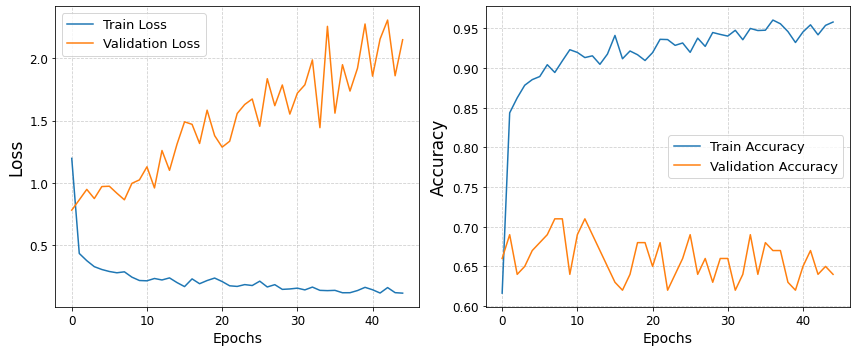

In [151]:

plot_new(train_loss, train_acc, val_loss, val_acc,points=False)

In [29]:
torch.save(resnet18_model_baseline, r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_model_baseline_new.pth')

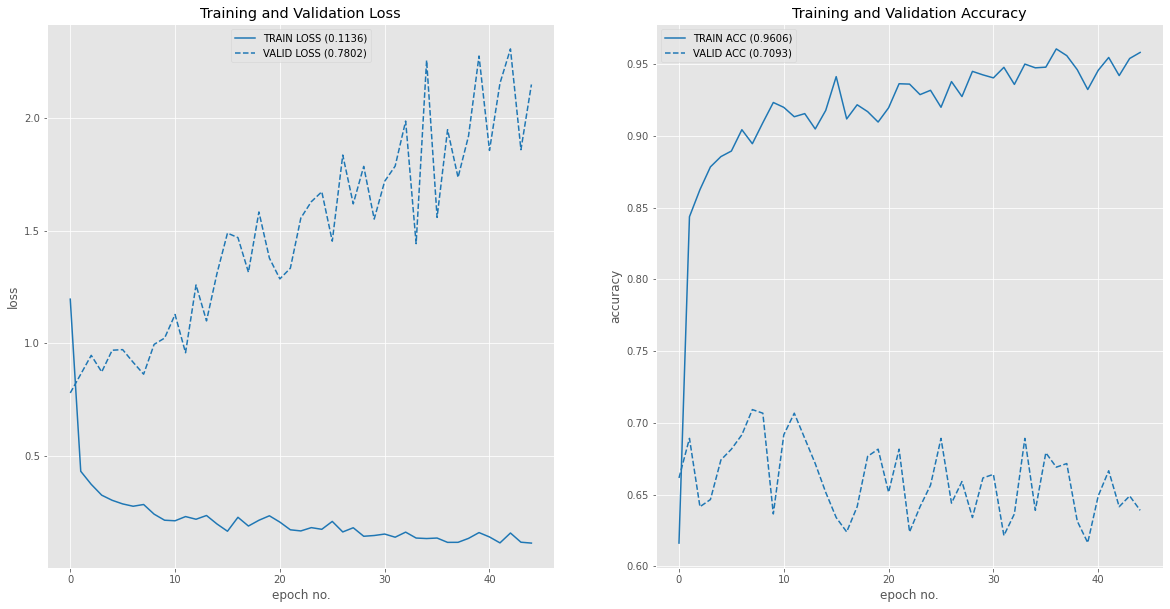

In [31]:
# torch.save(resnet18_CE_50ep, r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_CE_50ep.pth')
plot_loss_accuracy([train_loss],[val_loss],[train_acc],[val_acc])

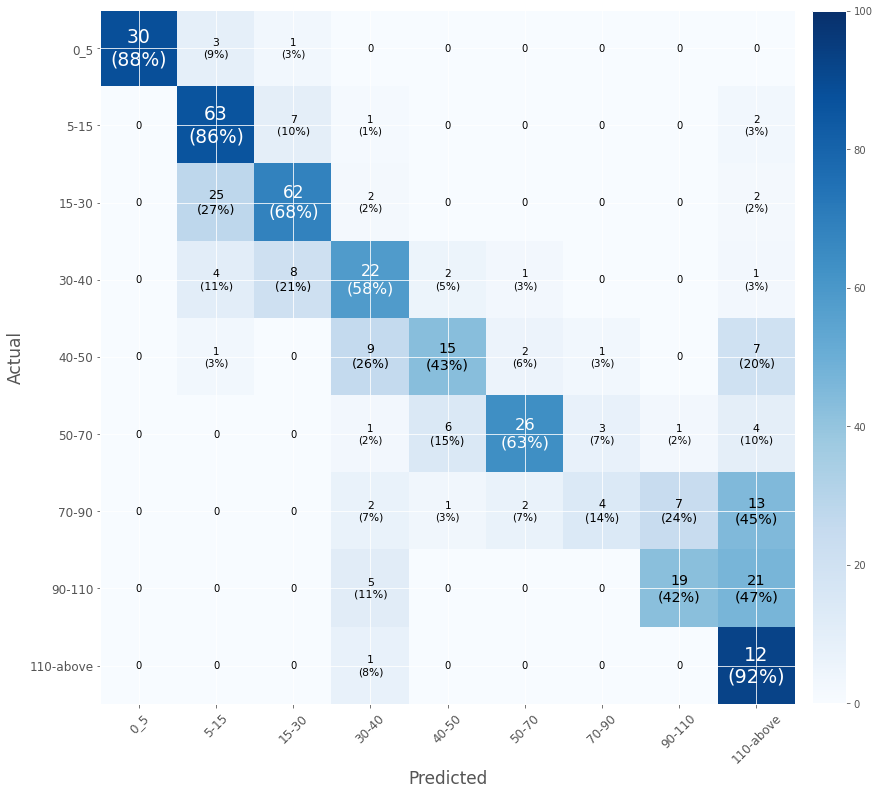

In [54]:
# Given data
confusion_matrix = np.array([[30,  3,  1,  0,  0,  0,  0,  0,  0],
        [ 0, 63,  7,  1,  0,  0,  0,  0,  2],
        [ 0, 25, 62,  2,  0,  0,  0,  0,  2],
        [ 0,  4,  8, 22,  2,  1,  0,  0,  1],
        [ 0,  1,  0,  9, 15,  2,  1,  0,  7],
        [ 0,  0,  0,  1,  6, 26,  3,  1,  4],
        [ 0,  0,  0,  2,  1,  2,  4,  7, 13],
        [ 0,  0,  0,  5,  0,  0,  0, 19, 21],
        [ 0,  0,  0,  1,  0,  0,  0,  0, 12]])
matrix_plot(confusion_matrix)

In [35]:
plot_metrics(cm, all_preds, all_labels,num_classes=9)

Accuracy: 0.6168
Precision: 0.6471
Recall: 0.6168
F1-Score (macro): 0.5839


In [5]:
import numpy as np
confusion_matrix = np.array([[30,  3,  1,  0,  0,  0,  0,  0,  0],
        [ 0, 63,  7,  1,  0,  0,  0,  0,  2],
        [ 0, 25, 62,  2,  0,  0,  0,  0,  2],
        [ 0,  4,  8, 22,  2,  1,  0,  0,  1],
        [ 0,  1,  0,  9, 15,  2,  1,  0,  7],
        [ 0,  0,  0,  1,  6, 26,  3,  1,  4],
        [ 0,  0,  0,  2,  1,  2,  4,  7, 13],
        [ 0,  0,  0,  5,  0,  0,  0, 19, 21],
        [ 0,  0,  0,  1,  0,  0,  0,  0, 12]])
TP = np.diag(confusion_matrix)
TN = np.sum(confusion_matrix) - (np.sum(confusion_matrix, axis=0) + np.sum(confusion_matrix, axis=1) - TP)
FP = np.sum(confusion_matrix, axis=0) - TP
FN = np.sum(confusion_matrix, axis=1) - TP

accuracy = np.sum(TP) / np.sum(confusion_matrix)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy:, {accuracy}")
print(f"Precision:, {precision}")
print(f"Recall:, {recall}")
print(f"F1-Score:, {f1_score}")

micro_precision = np.sum(TP) / (np.sum(TP) + np.sum(FP))
micro_recall = np.sum(TP) / (np.sum(TP) + np.sum(FN))
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

print(f"Micro-Precision:, {micro_precision}")
print(f"Micro-Recall:, {micro_recall}")
print(f"Micro F1-Score:, {micro_f1_score}")

print(f"Macro-Precision:, {macro_precision}")
print(f"Macro-Recall:, {macro_recall}")
print(f"Macro F1-Score:, {macro_f1_score}")

Accuracy:, 0.6340852130325815
Precision:, [1.         0.65625    0.79487179 0.51162791 0.625      0.83870968
 0.5        0.7037037  0.19354839]
Recall:, [0.88235294 0.8630137  0.68131868 0.57894737 0.42857143 0.63414634
 0.13793103 0.42222222 0.92307692]
F1-Score:, [0.9375     0.74556213 0.73372781 0.54320988 0.50847458 0.72222222
 0.21621622 0.52777778 0.32      ]
Micro-Precision:, 0.6340852130325815
Micro-Recall:, 0.6340852130325815
Micro F1-Score:, 0.6340852130325815
Macro-Precision:, 0.647079052229819
Macro-Recall:, 0.6168422932625653
Macro F1-Score:, 0.5838545122065573


## <font style="color:green">8.1.1 experiment 1.1 - Baseline more epochs</font><a name="step7"></a>

In [46]:
model = torch.load(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_model_baseline_new.pth')

In [48]:
# get optimizer and scheduler
optimizer, scheduler = get_optimizer_and_scheduler(model,opt=2) 

# train and validate
resnet18_model_baseline,*train_parameters  = main(model,optimizer,
                                           scheduler,data_augmentation=False)
train_loss, train_acc, val_loss, val_acc = train_parameters

Using CUDA
Test set: Average loss: 2.1461, Accuracy: 255/399 (64%)
Initial Test Loss : 2.146080, 
Initial Test Accuracy : 63.910%

Epoch: 0 
Train Loss: 0.086033 Acc: 0.9692
Elapsed 57.78s, 57.78 s/epoch, 1.60 s/batch, ets 2253.38s
Test set: Average loss: 1.9564, Accuracy: 263/399 (66%)
Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.086258 Acc: 0.9703
Elapsed 122.42s, 61.21 s/epoch, 1.70 s/batch, ets 2325.96s
Test set: Average loss: 2.2879, Accuracy: 254/399 (64%)
Epoch: 2 
Train Loss: 0.101337 Acc: 0.9638
Elapsed 186.56s, 62.19 s/epoch, 1.73 s/batch, ets 2300.94s
Test set: Average loss: 1.8441, Accuracy: 262/399 (66%)
Model Improved. Saving the Model...

Epoch: 3 
Train Loss: 0.106838 Acc: 0.9588
Elapsed 249.62s, 62.40 s/epoch, 1.73 s/batch, ets 2246.54s
Test set: Average loss: 2.7530, Accuracy: 241/399 (60%)
Epoch: 4 
Train Loss: 0.097989 Acc: 0.9641
Elapsed 313.12s, 62.62 s/epoch, 1.74 s/batch, ets 2191.84s
Test set: Average loss: 1.9201, Accuracy: 262/399 (66%)
Epoch:

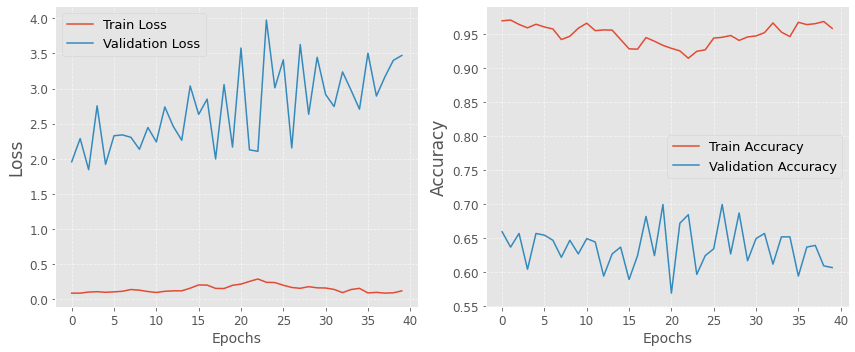

In [50]:
torch.save(resnet18_model_baseline, r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_model_baseline_new_book.pth')

plosts(train_loss,val_loss,train_acc,val_acc)

total correct: 236
accuracy: 0.5914786967418546
Confusion matrix, without normalization
tensor([[31,  2,  1,  0,  0,  0,  0,  0,  0],
        [ 0, 70,  3,  0,  0,  0,  0,  0,  1],
        [ 0, 45, 42,  1,  0,  0,  0,  0,  2],
        [ 0,  8, 11, 13,  4,  2,  0,  0,  1],
        [ 0,  0,  0,  5, 18,  2,  0,  0,  7],
        [ 0,  0,  0,  2,  7, 26,  3,  1,  4],
        [ 1,  0,  0,  1,  1,  3,  3,  6,  8],
        [ 0,  1,  0,  1,  0,  1,  2, 21, 23],
        [ 0,  0,  0,  1,  0,  0,  0,  2, 12]])


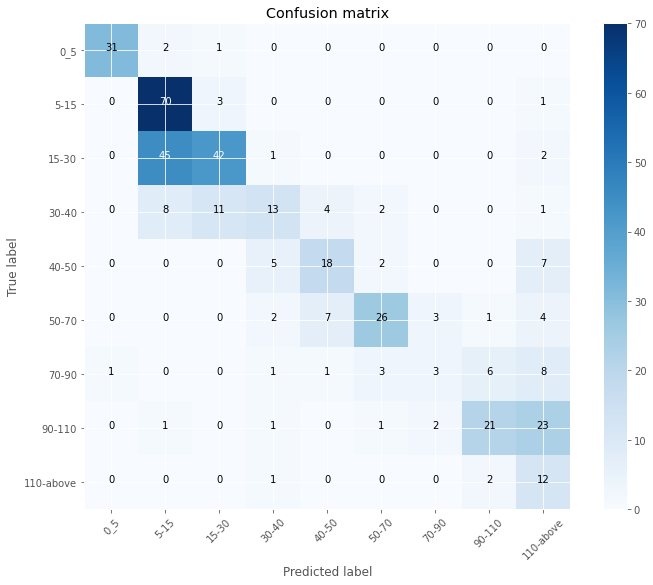

In [56]:
inter = {'0_5': 0, '5-15': 1, '15-30': 2, '30-40': 3, '40-50': 4, '50-70': 5, '70-90': 6,'90-110': 7,'110-above': 8}
test_file = 'test_index_cat.txt'
cm,all_preds,all_labels = con(model=resnet18_model_baseline,data_path=TrainingConfiguration.data_root,
                              file_path=test_file,
                              size=9,mean=TrainingConfiguration.mean,
                              std=TrainingConfiguration.std)
plot_confusion_matrix(cm,classes=inter,ranges=9)

***

## <font style="color:blue">8.2 experiment 2 - BASELINE with aug</font><a name="step7"></a>
***
original df / loss crossentropy

In [52]:
import torch.optim.lr_scheduler


#setting model
model_baseline_aug = pretrained_resnet18(num_class=9)#TransferModelResNet18()
# get optimizer and scheduler
optimizer, scheduler = get_optimizer_and_scheduler(model_baseline_aug) 

# train and validate
resnet18_model_baseline_aug,*train_parameters  = main(model_baseline_aug,optimizer,
                                           scheduler,data_augmentation=True)
train_loss, train_acc, val_loss, val_acc = train_parameters

Using CUDA
Test set: Average loss: 2.2977, Accuracy: 33/399 (8%)
Initial Test Loss : 2.297667, 
Initial Test Accuracy : 8.271%

Epoch: 0 
Train Loss: 1.445456 Acc: 0.5182
Elapsed 131.97s, 131.97 s/epoch, 3.67 s/batch, ets 5806.53s
Test set: Average loss: 1.0094, Accuracy: 241/399 (60%)
Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.762583 Acc: 0.7088
Elapsed 274.87s, 137.44 s/epoch, 3.82 s/batch, ets 5909.73s
Test set: Average loss: 0.7755, Accuracy: 279/399 (70%)
Model Improved. Saving the Model...

Epoch: 2 
Train Loss: 0.683320 Acc: 0.7395
Elapsed 458.19s, 152.73 s/epoch, 4.24 s/batch, ets 6414.65s
Test set: Average loss: 0.7601, Accuracy: 276/399 (69%)
Model Improved. Saving the Model...

Epoch: 3 
Train Loss: 0.749426 Acc: 0.7166
Elapsed 641.04s, 160.26 s/epoch, 4.45 s/batch, ets 6570.64s
Test set: Average loss: 0.7710, Accuracy: 282/399 (71%)
Epoch: 4 
Train Loss: 0.676974 Acc: 0.7444
Elapsed 822.12s, 164.42 s/epoch, 4.57 s/batch, ets 6576.92s
Test set: Average loss

In [53]:
torch.save(resnet18_model_baseline_aug, r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_model_baseline_aug_new.pth')

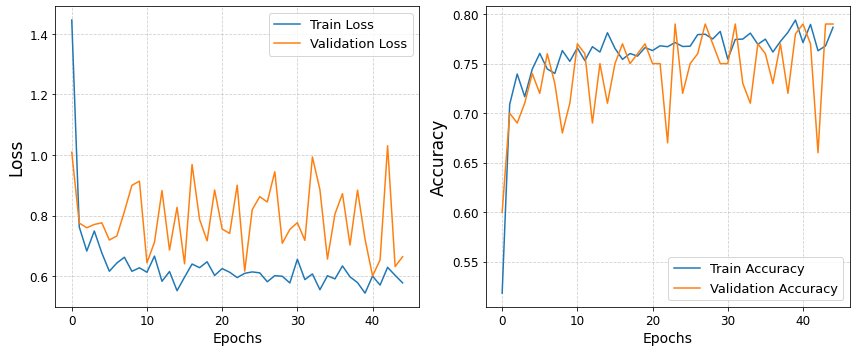

In [154]:
plot_new(train_loss, train_acc, val_loss, val_acc,points=False)

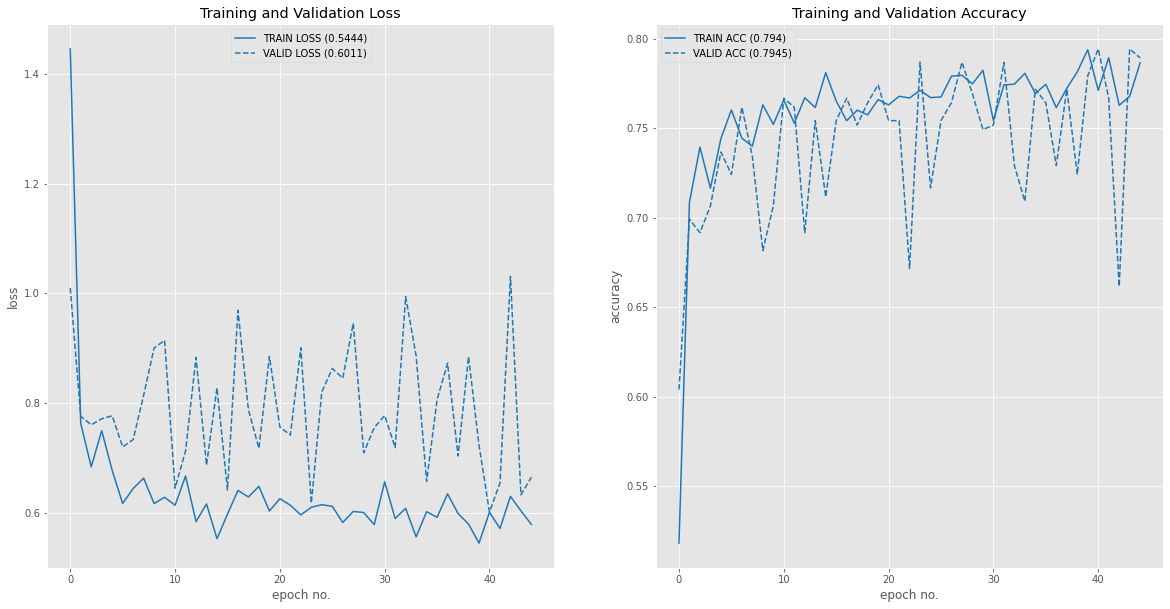

In [54]:
# torch.save(resnet18_CE_50ep, r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_CE_50ep.pth')
plot_loss_accuracy([train_loss],[val_loss],[train_acc],[val_acc])

total correct: 304
accuracy: 0.7619047619047619
Confusion matrix, without normalization
tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 63, 10,  0,  0,  0,  0,  0,  0],
        [ 0, 12, 75,  4,  0,  0,  0,  0,  0],
        [ 0,  1,  4, 28,  4,  1,  0,  0,  0],
        [ 0,  0,  0,  4, 31,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  7, 27,  7,  0,  0],
        [ 0,  0,  0,  1, 11,  0,  5,  8,  4],
        [ 0,  0,  0,  0,  6,  0,  1, 30,  8],
        [ 0,  0,  0,  0,  0,  0,  0,  2, 11]])


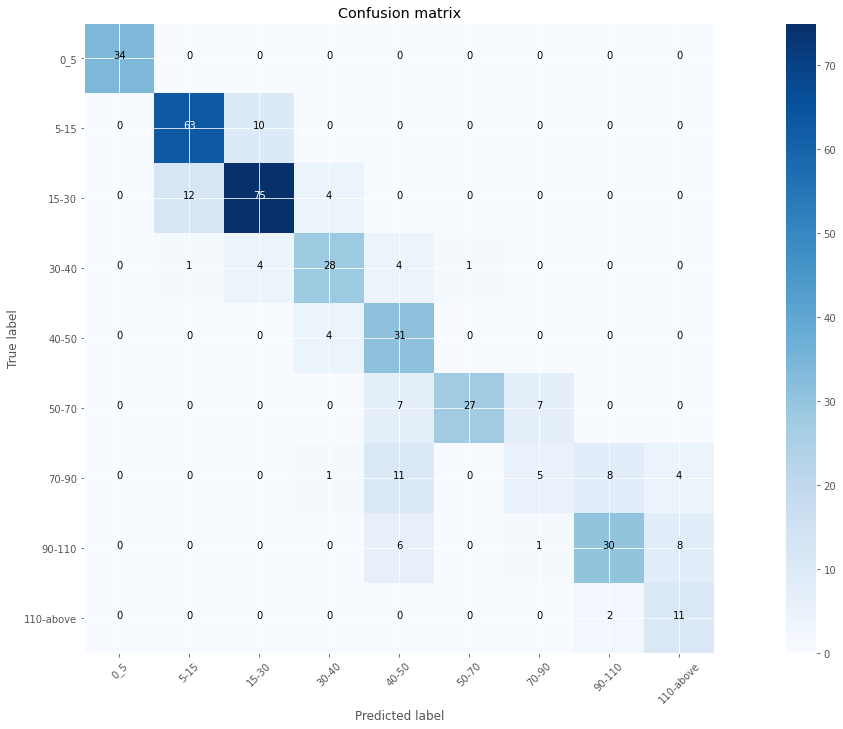

In [55]:
inter = {'0_5': 0, '5-15': 1, '15-30': 2, '30-40': 3, '40-50': 4, '50-70': 5, '70-90': 6,'90-110': 7,'110-above': 8}
test_file = 'test_index_cat.txt'
cm,all_preds,all_labels = con(model=resnet18_model_baseline_aug,data_path=TrainingConfiguration.data_root,
                              file_path=test_file,
                              size=9,mean=TrainingConfiguration.mean,
                              std=TrainingConfiguration.std)
plot_confusion_matrix(cm,classes=inter,ranges=9)

In [56]:
plot_metrics(cm, all_preds, all_labels,num_classes=9)

Accuracy: 0.7393
Precision: 0.7257
Recall: 0.7393
F1-Score (macro): 0.7137


In [58]:
import numpy as np

confusion_matrix = np.array([[34,  0,  0,  0,  0,  0,  0,  0,  0],
                             [ 0, 63, 10,  0,  0,  0,  0,  0,  0],
                             [ 0, 12, 75,  4,  0,  0,  0,  0,  0],
                             [ 0,  1,  4, 28,  4,  1,  0,  0,  0],
                             [ 0,  0,  0,  4, 31,  0,  0,  0,  0],
                             [ 0,  0,  0,  0,  7, 27,  7,  0,  0],
                             [ 0,  0,  0,  1, 11,  0,  5,  8,  4],
                             [ 0,  0,  0,  0,  6,  0,  1, 30,  8],
                             [ 0,  0,  0,  0,  0,  0,  0,  2, 11]])
TP = np.diag(confusion_matrix)
TN = np.sum(confusion_matrix) - (np.sum(confusion_matrix, axis=0) + np.sum(confusion_matrix, axis=1) - TP)
FP = np.sum(confusion_matrix, axis=0) - TP
FN = np.sum(confusion_matrix, axis=1) - TP

accuracy = np.sum(TP) / np.sum(confusion_matrix)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

micro_precision = np.sum(TP) / (np.sum(TP) + np.sum(FP))
micro_recall = np.sum(TP) / (np.sum(TP) + np.sum(FN))
micro_f1_score = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)

print("Micro-Precision:", micro_precision)
print("Micro-Recall:", micro_recall)
print("Micro F1-Score:", micro_f1_score)

print("Macro-Precision:", macro_precision)
print("Macro-Recall:", macro_recall)
print("Macro F1-Score:", macro_f1_score)

Accuracy: 0.7619047619047619
Precision: [1.         0.82894737 0.84269663 0.75675676 0.52542373 0.96428571
 0.38461538 0.75       0.47826087]
Recall: [1.         0.8630137  0.82417582 0.73684211 0.88571429 0.65853659
 0.17241379 0.66666667 0.84615385]
F1-Score: [1.         0.84563758 0.83333333 0.74666667 0.65957447 0.7826087
 0.23809524 0.70588235 0.61111111]
Micro-Precision: 0.7619047619047619
Micro-Recall: 0.7619047619047619
Micro F1-Score: 0.7619047619047619
Macro-Precision: 0.7256651612967965
Macro-Recall: 0.7392796450081355
Macro F1-Score: 0.7136566055308248


## <font style="color:blue">8.2.1 experiment 2.1 - BASELINE with aug more epochs</font><a name="step7"></a>

In [78]:
model = torch.load(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered\table_data\final\seven\models\extra\resnet18_model_baseline_aug_new.pth')

In [79]:
# get optimizer and scheduler
optimizer, scheduler = get_optimizer_and_scheduler(model) 

# train and validate
model_aug_ep,*train_parameters  = main(model,optimizer,
                                           scheduler,data_augmentation=True)
train_loss, train_acc, val_loss, val_acc = train_parameters

Using CUDA
Test set: Average loss: 0.6692, Accuracy: 314/399 (79%)
Initial Test Loss : 0.669162, 
Initial Test Accuracy : 78.697%

Epoch: 0 
Train Loss: 0.825915 Acc: 0.7341
Elapsed 127.33s, 127.33 s/epoch, 3.54 s/batch, ets 5602.43s
Test set: Average loss: 0.7393, Accuracy: 290/399 (73%)
Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.558973 Acc: 0.7829
Elapsed 261.02s, 130.51 s/epoch, 3.63 s/batch, ets 5611.98s
Test set: Average loss: 0.8104, Accuracy: 314/399 (79%)
Epoch: 2 
Train Loss: 0.518743 Acc: 0.8033
Elapsed 395.46s, 131.82 s/epoch, 3.66 s/batch, ets 5536.39s
Test set: Average loss: 0.6785, Accuracy: 311/399 (78%)
Model Improved. Saving the Model...

Epoch: 3 
Train Loss: 0.599144 Acc: 0.7740
Elapsed 528.88s, 132.22 s/epoch, 3.67 s/batch, ets 5421.06s
Test set: Average loss: 0.7129, Accuracy: 304/399 (76%)
Epoch: 4 
Train Loss: 0.586333 Acc: 0.7761
Elapsed 662.99s, 132.60 s/epoch, 3.68 s/batch, ets 5303.90s
Test set: Average loss: 0.6765, Accuracy: 312/399 (78%)


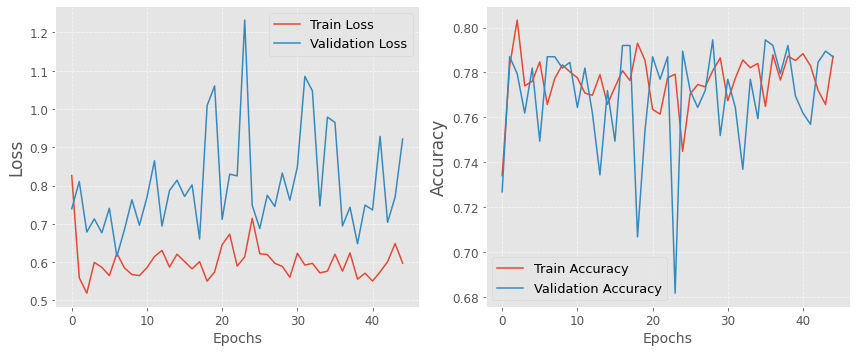

In [80]:
plosts(train_loss,val_loss,train_acc,val_acc)

total correct: 318
accuracy: 0.7969924812030075
Confusion matrix, without normalization
tensor([[34,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 68,  6,  0,  0,  0,  0,  0,  0],
        [ 0, 19, 70,  1,  0,  0,  0,  0,  0],
        [ 0,  1,  3, 31,  4,  0,  0,  0,  0],
        [ 0,  0,  0,  3, 29,  0,  0,  0,  0],
        [ 0,  0,  0,  0, 10, 32,  1,  0,  0],
        [ 0,  0,  0,  0, 10,  0,  0, 12,  1],
        [ 0,  0,  0,  0,  2,  0,  0, 47,  0],
        [ 0,  0,  0,  0,  1,  0,  0,  7,  7]])


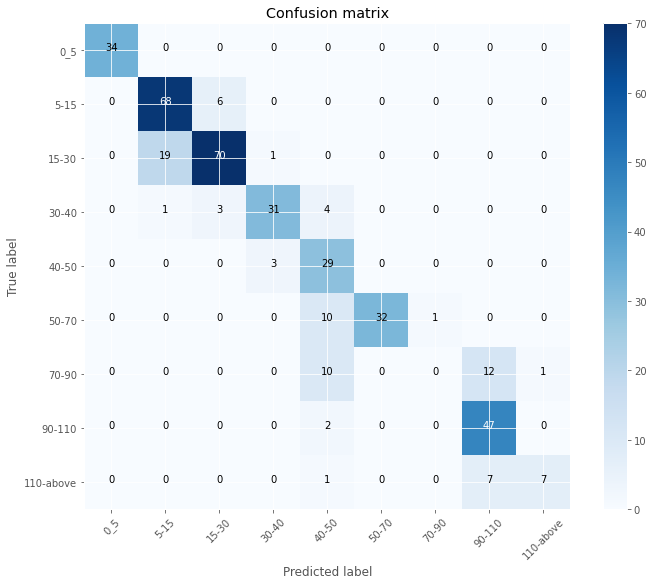

In [81]:
inter = {'0_5': 0, '5-15': 1, '15-30': 2, '30-40': 3, '40-50': 4, '50-70': 5, '70-90': 6,'90-110': 7,'110-above': 8}
test_file = 'test_index_cat.txt'
cm,all_preds,all_labels = con(model=model_aug_ep,data_path=TrainingConfiguration.data_root,
                              file_path=test_file,
                              size=9,mean=TrainingConfiguration.mean,
                              std=TrainingConfiguration.std)
plot_confusion_matrix(cm,classes=inter,ranges=9)


## <font style="color:blue">8.3 Explore Mistakes</font><a name="step7"></a>

In [113]:
from sklearn.metrics import f1_score
import itertools

import numpy as np
import matplotlib.pyplot as plt
def prediction(model, device, batch_input):
    
    # send model to cpu/cuda according to your system configuration
    model.to(device)
    
    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]
    
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()
def disply_mistakes(model, mean, std,data_root=None,dataset_file=None):
    batch_size = 4

#     if torch.cuda.is_available():
#         device = "cuda"
#         num_workers = 4
#     else:
#         device = "cpu"
#         num_workers = 2
        
    device = "cpu"
    num_workers = 2    
    if dataset_file is None:
        # transformed data
        test_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(mean, std))

        # original image dataset
        test_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms())
    else:
        path = os.path.join(data_root,dataset_file)
        test_dataset_trans = ImageFilelist(root=data_root, flist=path,transform=image_common_transforms())
        test_dataset = ImageFilelist(root=data_root, flist=path,transform=image_preprocess_transforms())
    
    data_len = test_dataset.__len__()
    
    interval = int(data_len/batch_size)
    
    imgs = []
    inputs = []
    targets = []
    inx = []
    l = []
    batch = 0
    for i in range(data_len):
        index = i
        trans_input, target = test_dataset_trans.__getitem__(index)#test_dataset_trans
        img, _ = test_dataset.__getitem__(index)
        
        imgs.append(img)
        inputs.append(trans_input)
        targets.append(target)
        inx.append(index)
#         print(f'end of batch {batch}')
        batch+=1
        
    inputs = torch.stack(inputs)
#     print(inputs)   
    cls, prob = prediction(model, device, batch_input=inputs)
#   
    
    for i,v in enumerate(prob):
#         print(i,v,cls[i],targets[i])
        if cls[i]!=targets[i]:
            l.append([imgs[i],cls[i],targets[i],v])
            
            
    image,class_pred,target_real,prob = zip(*l)
    idx = torch.sort(torch.tensor(prob))[1][-35:]
#     return l
    plt.style.use('default')
    plt.rcParams["figure.figsize"] = (18, 60)
    fig = plt.figure()

    for i, target in enumerate(idx):
#         idx = int(idx)
        plt.subplot(12, 3, i+1)
        img = transforms.functional.to_pil_image(image[target])
        plt.imshow(img)
        plt.gca().set_title('P:{0}({1:.2}), T:{2}'.format(class_pred[target], 
                                                     prob[target], 
                                                     target_real[target]))
    fig.savefig('sample_prediction.png')
    plt.tight_layout();
    plt.show();
    return imgs,inputs,targets,cls,prob,l

def image_preprocess_transforms():
    
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(222),
        transforms.ToTensor()
        ])
    
    return preprocess
def image_common_transforms(mean=TrainingConfiguration.mean, std=TrainingConfiguration.std):
    preprocess = image_preprocess_transforms()
    
    common_transforms = transforms.Compose([
        preprocess,
        transforms.Normalize(mean, std)
    ])
    
    return common_transforms

def con(model,data_path,file_path,size,mean, std,classes=None):#train_data_path/test_data_path
    
#     device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    device = "cpu"
    batch_size = 32
    num_workers = 4
    if torch.cuda.is_available():
        device = "cuda:0"
        batch_size = 64
        num_workers = 0

        
        
#     device = 'cpu'
    model = model.to(device)
    @torch.no_grad()
    def get_all_preds(model,loader ):
        all_preds = torch.tensor([])
        all_labels = torch.tensor([])
        
        all_preds, all_labels = all_preds.to(device), all_labels.to(device)#added
        
        for batch in loader:
            images, labels = batch
            
            images, labels = images.to(device), labels.to(device)#added
            
            preds = model(images)
            
            preds = preds.to(device)#added
            
            all_preds = torch.cat(
                (all_preds, preds)
                ,dim=0
            )
            all_labels = torch.cat(
                (all_labels, labels)
                ,dim=0
            )
        return all_preds,all_labels

    def extract_data(model,data_path):
        with torch.no_grad():
            test_data_path = os.path.join(data_path,file_path)#'validation_txt.txt')
            #r'table_data/final/seven/outlier/test_original.txt'
            test_loader = data_loader(data_path,test_data_path, 
                                      image_common_transforms(), 
                                      batch_size=batch_size, 
                                      shuffle=True, 
                                      num_workers=num_workers)

            all_preds,all_labels = get_all_preds(model, test_loader)
            return all_preds,all_labels
    def get_num_correct(all_preds,all_labels):
        preds_correct = all_preds.argmax(dim=1).eq(all_labels).sum().item()
        print('total correct:', preds_correct)
        print('accuracy:', preds_correct / len(all_labels))
     
    def matrix(size,all_preds,all_labels):
        stacked = torch.stack((all_labels,all_preds.argmax(dim=1)),dim=1)
        stacked[0].tolist()
        cmt = torch.zeros(size,size, dtype=torch.int64)
        for p in stacked:
            tl, pl = p.tolist()
            tl, pl = int(tl), int(pl)
            cmt[tl, pl] = cmt[tl, pl] + 1
        return cmt


    all_preds,all_labels = extract_data(model,data_path)
#     print('F1-Score macro: ',f1_score(all_preds.cpu(), all_labels.cpu(), average='macro'))
#     print('F1-Score micro: ',f1_score(all_preds.cpu(), all_labels.cpu(), average='micro'))
    get_num_correct(all_preds,all_labels)
    cmt = matrix(size,all_preds.cpu(),all_labels.cpu())
    
    return cmt,all_preds,all_labels



def plot_confusion_matrix(cm, classes=None, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues,ranges=1):
    tick_marks = np.arange(ranges)
    if classes is None:
        original = ['0_5','6-15','16-30','31-50','51-70','71-90','91-above']
        modified = ['0-5','6-20','21-32','33-50','51-70','71-100','101-above']
        ranges= original if ranges==1 else modified 
        classes ={range:i for i,range in enumerate(ranges)}
        tick_marks = np.arange(len(ranges))
        print(classes)
    if normalize:
        cm = cm / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(15,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap);
    plt.title(title);
    plt.colorbar()
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout();
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    


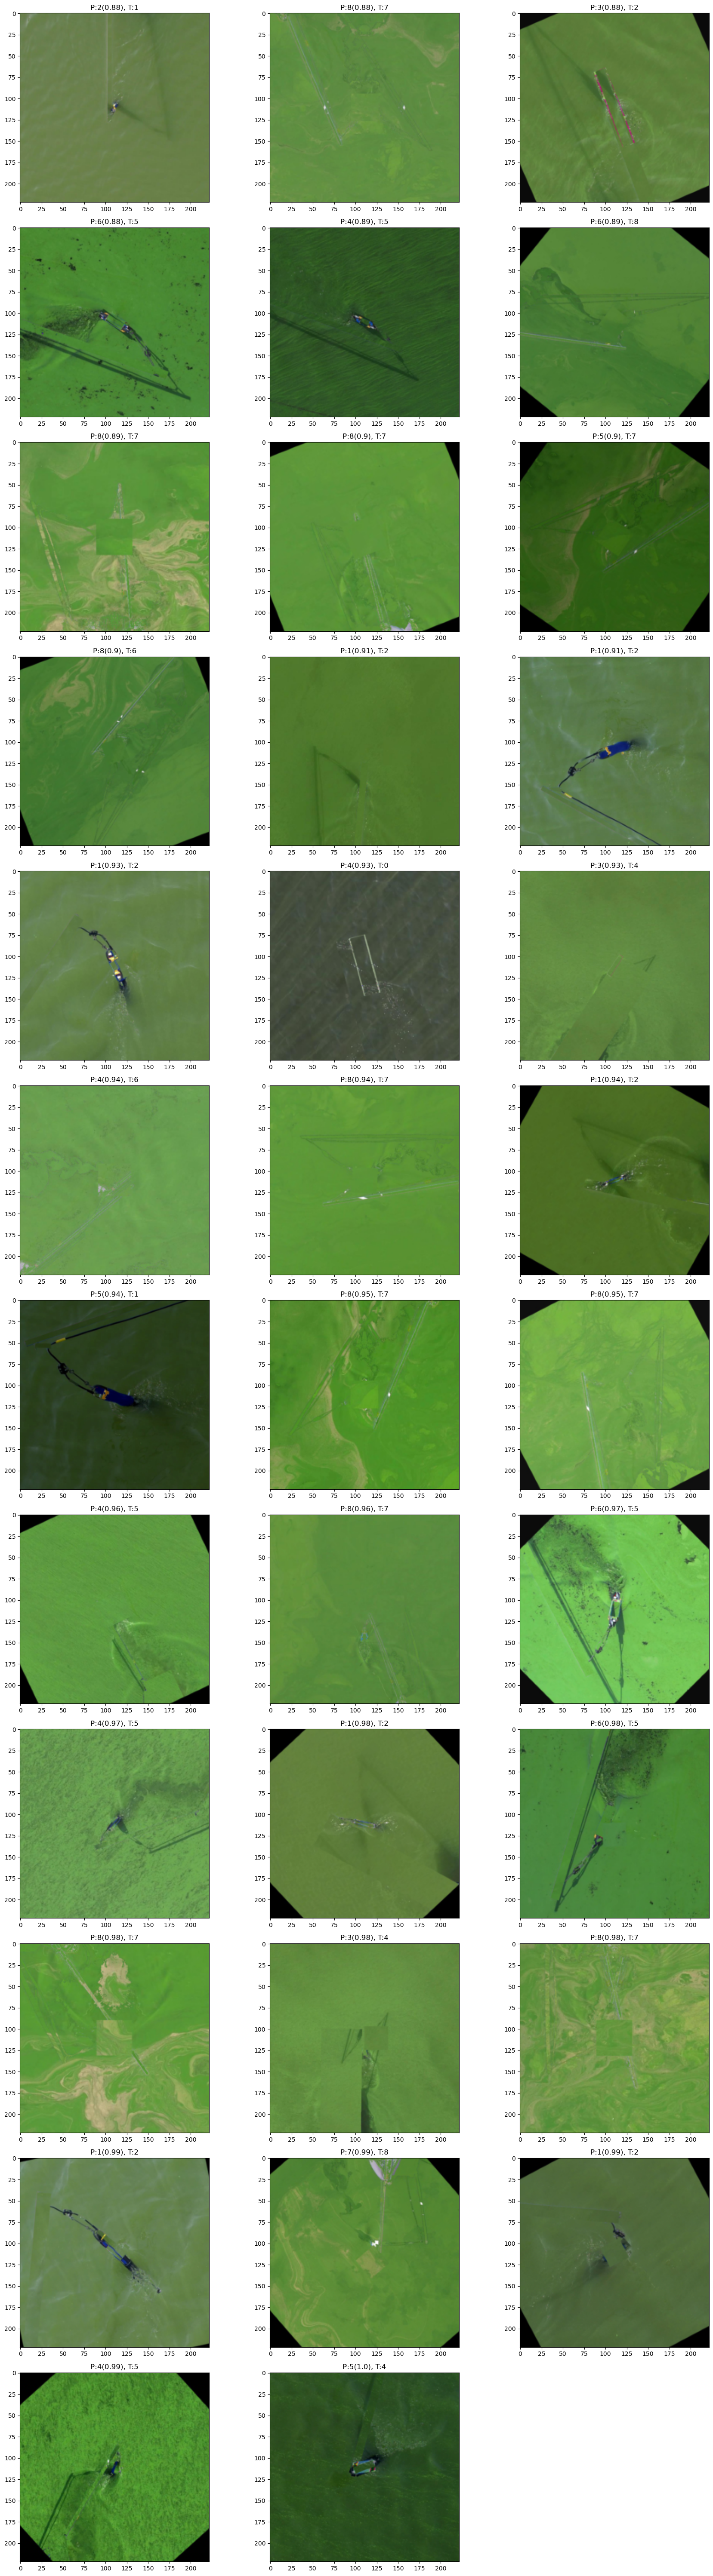

In [115]:

data_root=TrainingConfiguration.data_root#r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\final\validation'
dataset_file =  'test_index.txt'#r'test_index_cat.txt'
mean=TrainingConfiguration.mean
std=TrainingConfiguration.std
imgs,inputs,targets,cls,prob,l = disply_mistakes(model=m_baseline_YAUG,mean= mean, std=std,data_root=data_root,dataset_file=dataset_file)



## <font style="color:blue">9 Reveal model's Activations </font><a name="step7"></a>

In [445]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
model = copy.deepcopy(model_test)



In [408]:
# Iterate over the named children modules
for name, module in model.model.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


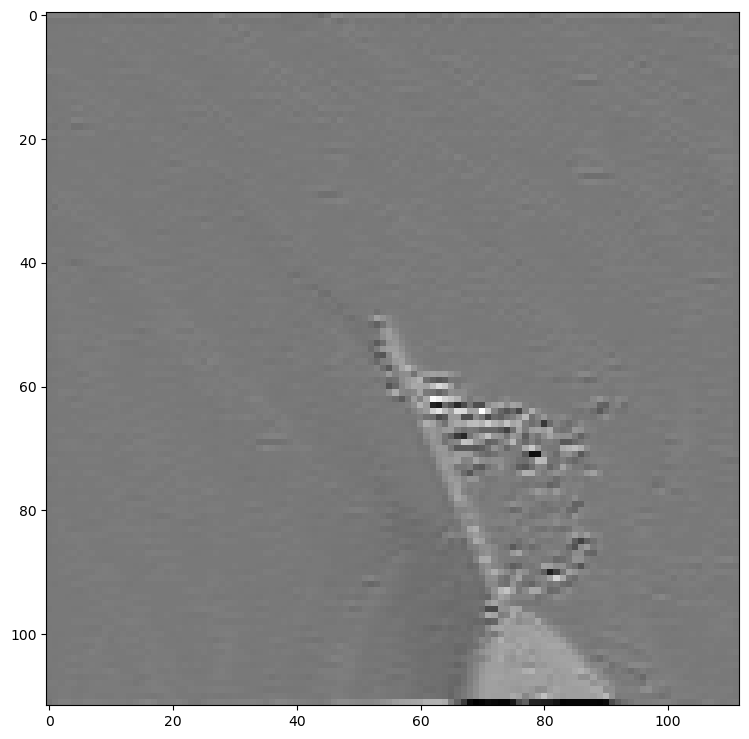

In [406]:
model = model.to('cuda') 
layer_outputs = []

def hook(module, input, output):
    layer_outputs.append(output)

# Choose the layer you want to visualize
# target_layer = model.layer1[-1].conv2  # Example: Last convolutional layer in the first residual block
target_layer = model.model.conv1
# Register the hook
hook_handle = target_layer.register_forward_hook(hook)

# Load and preprocess an image
image = Image.open(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\22_1638259974.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3606, 0.5079, 0.2694], std=[0.0788, 0.0857, 0.0920])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0).to('cuda')

model.eval()
with torch.no_grad():
    model(input_batch)
    
# Access the output of the target layer
layer_output = layer_outputs[0]

# Visualize the output
plt.imshow(layer_output[0, 0].detach().cpu().numpy(), cmap='gray')  # Assuming the output is grayscale
plt.show()




In [420]:
model.model.layer1.

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

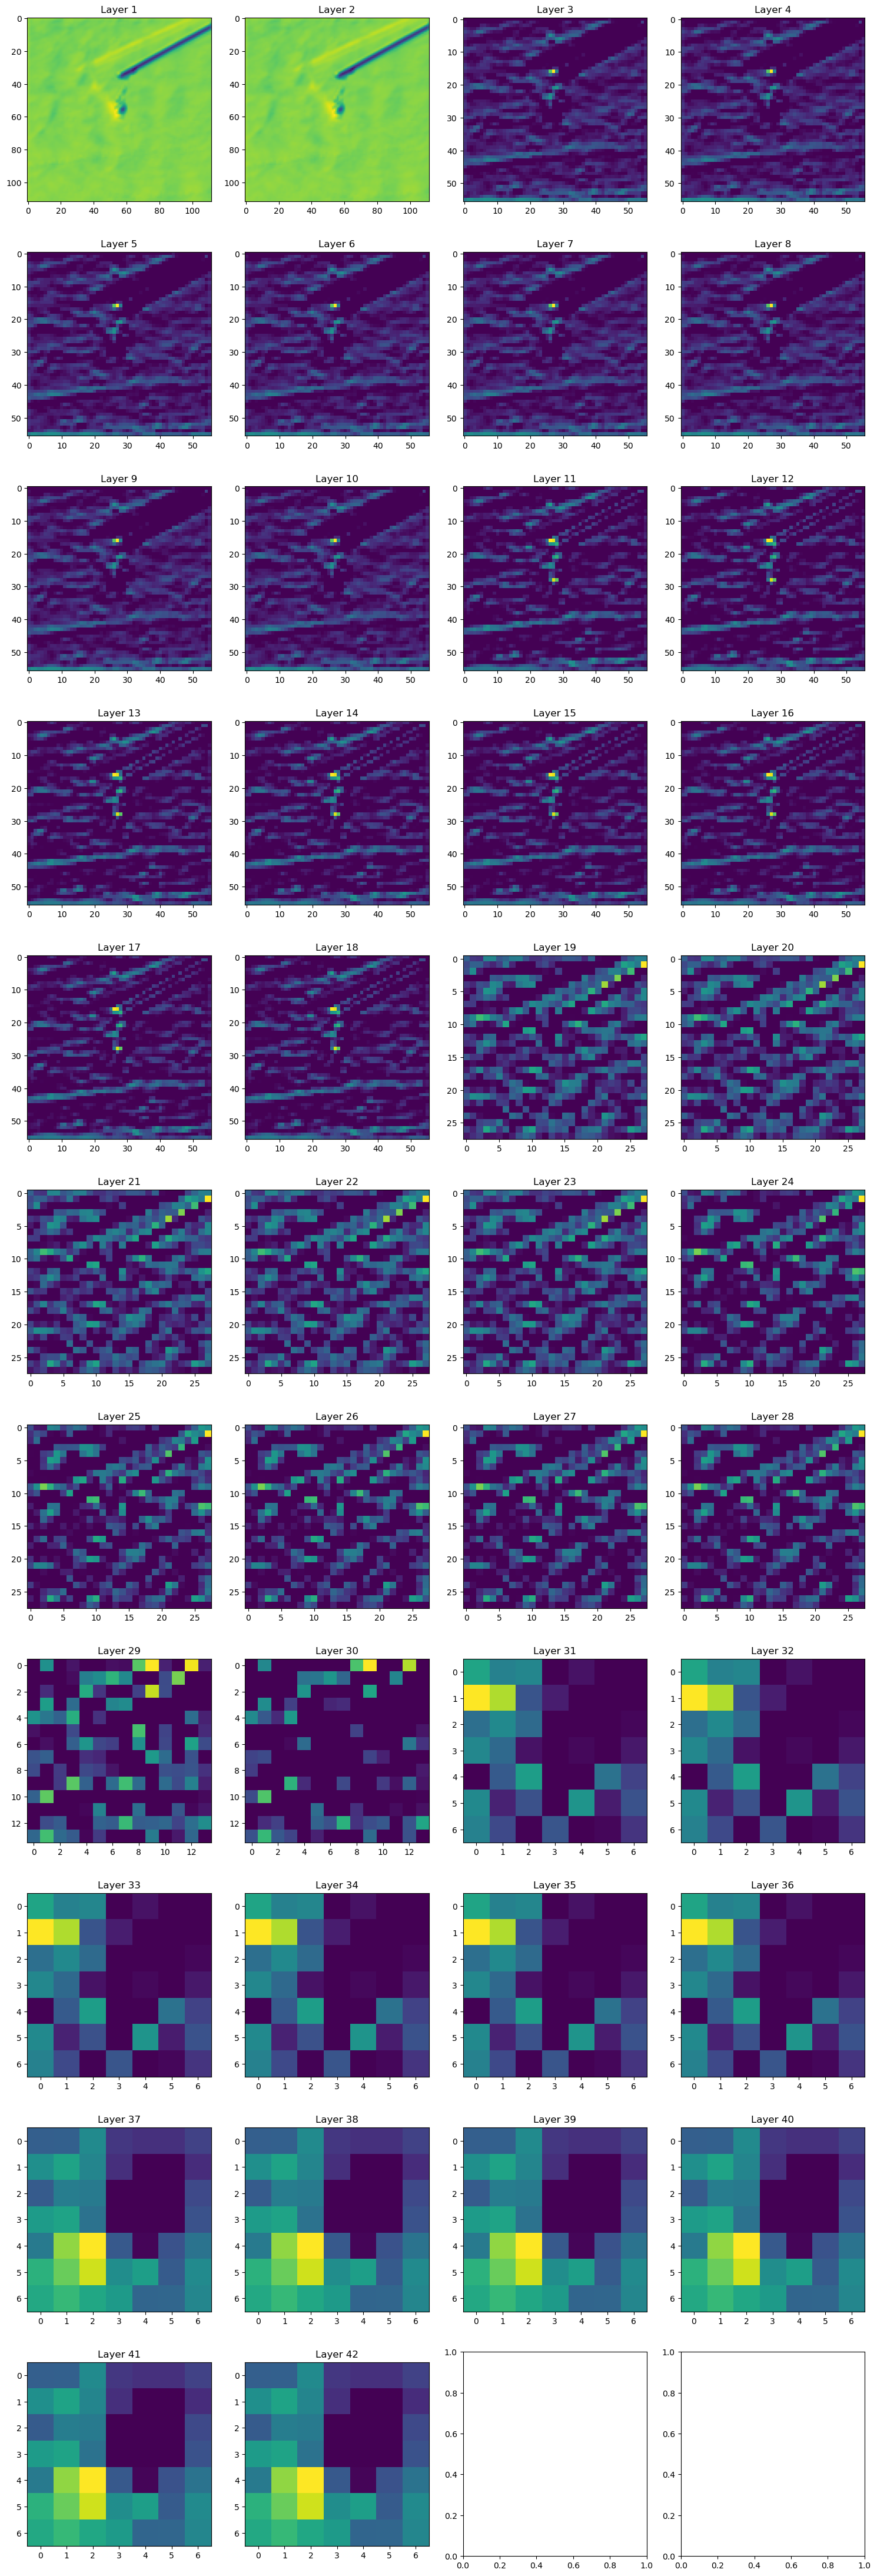

In [443]:
layer1_module = model.model.layer4

layer_outputs = []

def hook(module, input, output):
    layer_outputs.append(output)

# Register the hook for all layers in layer 1
for layer in layer1_module:
    layer.register_forward_hook(hook)

# Load and preprocess an image
image = Image.open(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\27_1637054039.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3606, 0.5079, 0.2694], std=[0.0788, 0.0857, 0.0920])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0).to('cuda')

model.eval()
with torch.no_grad():
    model(input_batch)

# Visualize the outputs
num_layers = len(layer_outputs)
rows = int(np.ceil(num_layers/4))

fig, axs = plt.subplots(rows, 4, figsize=(15, 4*rows))

for i, layer_output in enumerate(layer_outputs):
    axs[i // 4, i % 4].imshow(layer_output[0, 7].detach().cpu().numpy())#, cmap='gray')
    axs[i // 4, i % 4].set_title(f"Layer {i+1}")

plt.tight_layout()
plt.show()

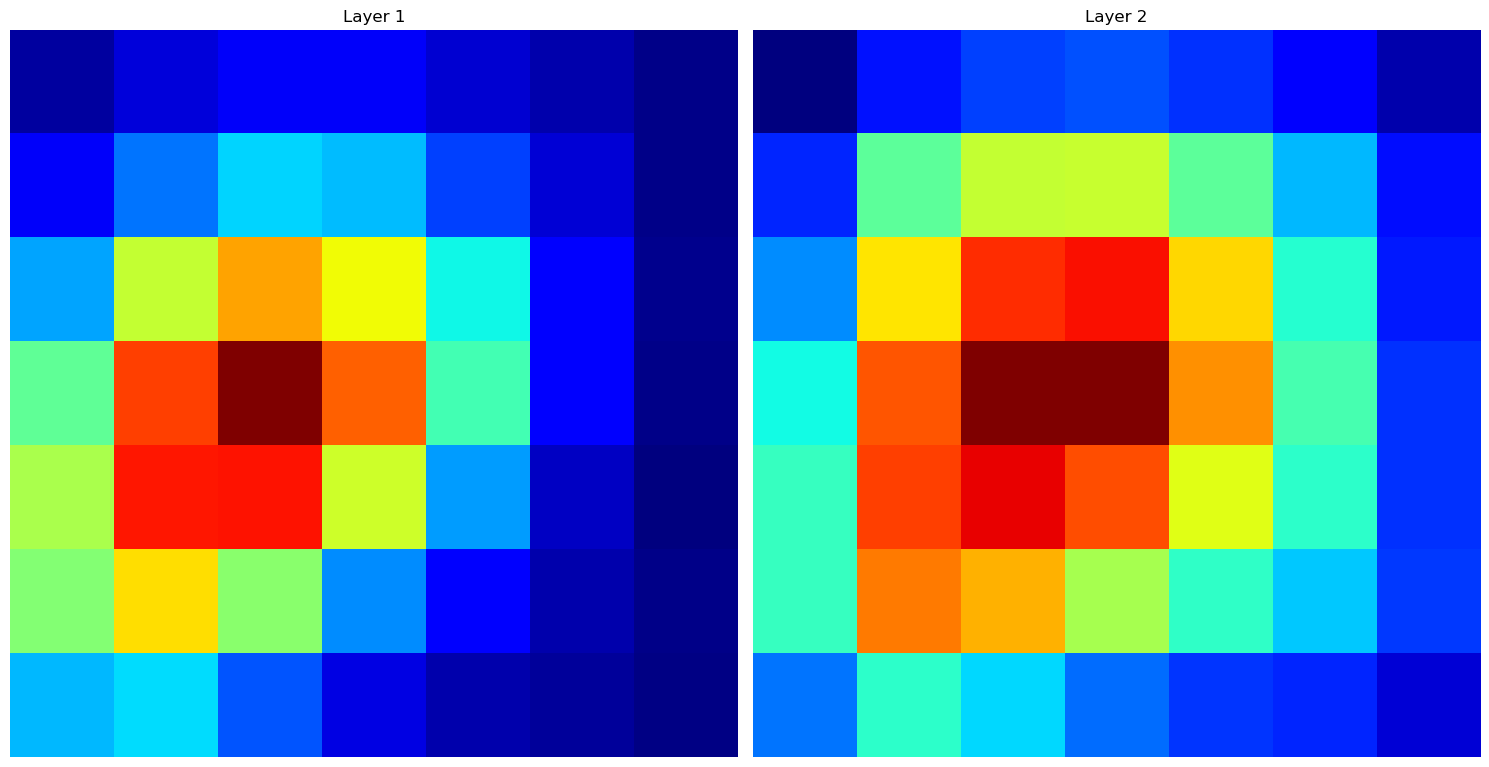

In [492]:
import torch
from torchvision.models import resnet50
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Move the model to the desired device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

# Choose the layer you want to visualize
target_layers = [model.model.layer4[0].conv2, model.model.layer4[1].conv2]

# Load and preprocess the image
image_path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\259_1637053070.jpg'
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3606, 0.5079, 0.2694], std=[0.0788, 0.0857, 0.0920])
])
image = Image.open(image_path)
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0).to(device)

# Get the model predictions
with torch.no_grad():
    output = model(input_batch)

# Iterate over the target layers
for i, target_layer in enumerate(target_layers):
    # Forward pass up to the target layer
    with torch.no_grad():
        activations = model.model.conv1(input_batch)
        activations = model.model.bn1(activations)
        activations = model.model.relu(activations)
        activations = model.model.maxpool(activations)
        activations = model.model.layer1(activations)
        activations = model.model.layer2(activations)
        activations = model.model.layer3(activations)
        activations = model.model.layer4(activations)
        activations = target_layer(activations)

    # Normalize the activations
    normalized_activations = torch.clamp(activations, min=0)
    normalized_activations /= torch.max(normalized_activations)

    # Compute the average activation value for each channel
    channel_activations = normalized_activations.mean(dim=(2, 3))

    # Select the channel with the highest average activation
    channel_index = torch.argmax(channel_activations)

    # Convert to numpy array
    channel_activations = normalized_activations[:, channel_index, :, :].squeeze().cpu().numpy()

    # Visualize the channel activations
    plt.subplot(1, len(target_layers), i + 1)
    plt.imshow(channel_activations, cmap='jet')
    plt.axis('off')
    plt.title(f'Layer {i+1}')

plt.tight_layout()
plt.show()
